In [17]:
import numpy as np
import matplotlib.pyplot as plt

In [20]:
dt = 0.001
t = np.arange(0,1,dt)
f = np.sin(2*np.pi*50*t) + np.cos(2 * np.pi*37 * t)
epi = np.random.randn(len(t))
f_noise = f + epi

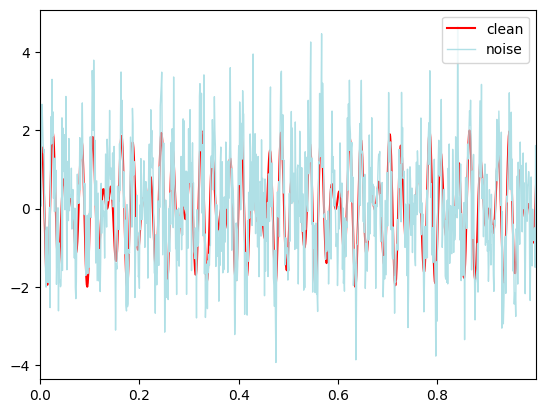

In [21]:
plt.plot(t,f,color = 'r', linewidth = 1.5, label = 'clean')
plt.plot(t,f_noise, color = 'powderblue', linewidth=1, label = 'noise')
plt.xlim(t[0],t[-1])
plt.legend()

In [22]:
n = len(t)
f_hat = np.fft.fft(f_noise ,n)
#f_hat includes complex numbers 
#PSD is the magnitude of each fourier bases 
PSD = f_hat * np.conj(f_hat)/n
#frequency
freq = (1/(dt*n)) * np.arange(n)
L = np.arange(1,np.floor(n/2), dtype = 'int')


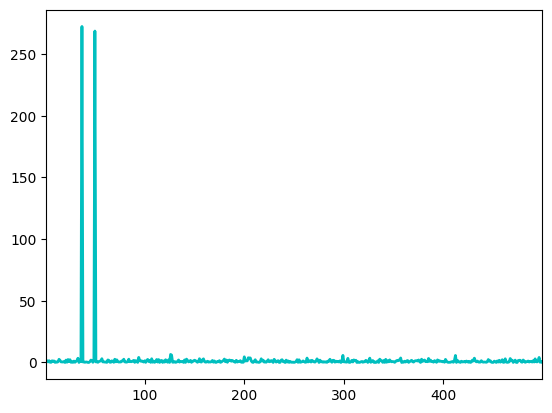

In [23]:
plt.plot(freq[L], PSD[L],color='c',
         linewidth=2,label = 'Noisy')
plt.xlim(freq[L[0]],freq[L[-1]])
plt.show()

e:\Anaconda\envs\DL\lib\site-packages\matplotlib\cbook\__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


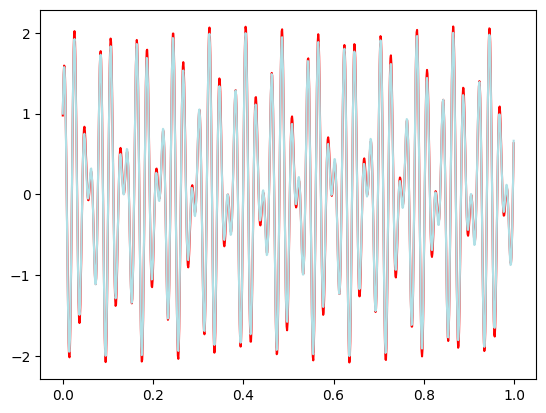

In [26]:
#PSD to filter out noise
indices = PSD >200
PSDclean = PSD * indices
f_clean = f_hat * indices
ifft = np.fft.ifft(f_clean)

plt.plot(t,ifft,color = 'r', linewidth = 1.5, label = 'denoise with fft')
plt.plot(t,f,color = 'powderblue', linewidth = 1.5, label = 'clean')
plt.show()